In [ ]:
# 8. Автоэнкодер для уменьшения размерности данных с последующей классификацией: Создание автоэнкодера, 
# который снижает размерность высокоразмерных данных, после чего сжатые представления используются для задач классификации.

In [ ]:
# делаем автоенкодер

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class Autoencoder1(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder1, self).__init__()

        # Энкодер
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, encoding_dim)
        self.relu2 = nn.ReLU()
        
        # Декодер
        self.fc3 = nn.Linear(encoding_dim, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, input_dim)
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        return x

    def decode(self, z):
        z = self.fc3(z)
        z = self.relu3(z)
        z = self.fc4(z)
        z = self.sigmoid(z)
        return z
        
    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded, x
        
        
        return x
print('ok')

ok


In [ ]:
# загружаем данные

In [2]:
import pandas as pd

def print_separator(title):
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

print("load csv")
dataset = pd.read_csv('../hw1/hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset)
print(dataset.head())
print(dataset.info())
print(dataset.describe())

load csv
                     dt    open   close    high     low                Date
0      2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1      2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2      2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3      2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4      2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
...                 ...     ...     ...     ...     ...                 ...
24409  2008.12.31 16:45  1.3965  1.3898  1.3966  1.3890 2008-12-31 16:45:00
24410  2008.12.31 17:00  1.3896  1.3917  1.3932  1.3887 2008-12-31 17:00:00
24411  2008.12.31 17:15  1.3919  1.3971  1.3971  1.3915 2008-12-31 17:15:00
24412  2008.12.31 17:30  1.3974  1.3956  1.3984  1.3954 2008-12-31 17:30:00
24413  2008.12.31 17:45  1.3957  1.3917  1.3957  1.3914 2008-12-31 17:45:00

[24414 rows x 6 columns]
                 dt    open   close    high     low  

In [ ]:
# добавляем лаги

In [3]:
lag = 15
for i in range(1, lag + 1):
        dataset[f'lag_{i}'] = dataset['close'].shift(i)

dataset.dropna(inplace=True)

In [ ]:
# создаем метки для классификации
# 1 up, 2 - down, 0 - none

In [4]:
labels = []
close_prices = dataset['close'].values
labels.insert(0, 0)
for i in range(1, len(close_prices)):
    change = close_prices[i] - close_prices[i - 1]
    if change > 0.0001:
        labels.append(1)
    elif change < -0.0001:
        labels.append(2)
    else:
        labels.append(0)

dataset['labels'] = labels
print(dataset)
print(dataset.head())
print(dataset.info())
print(dataset.describe())

                     dt    open   close    high     low                Date  \
15     2008.01.02 13:45  1.4686  1.4688  1.4689  1.4684 2008-01-02 13:45:00   
16     2008.01.02 14:00  1.4689  1.4685  1.4698  1.4682 2008-01-02 14:00:00   
17     2008.01.02 14:15  1.4686  1.4676  1.4687  1.4670 2008-01-02 14:15:00   
18     2008.01.02 14:30  1.4677  1.4666  1.4681  1.4664 2008-01-02 14:30:00   
19     2008.01.02 14:45  1.4667  1.4661  1.4668  1.4661 2008-01-02 14:45:00   
...                 ...     ...     ...     ...     ...                 ...   
24409  2008.12.31 16:45  1.3965  1.3898  1.3966  1.3890 2008-12-31 16:45:00   
24410  2008.12.31 17:00  1.3896  1.3917  1.3932  1.3887 2008-12-31 17:00:00   
24411  2008.12.31 17:15  1.3919  1.3971  1.3971  1.3915 2008-12-31 17:15:00   
24412  2008.12.31 17:30  1.3974  1.3956  1.3984  1.3954 2008-12-31 17:30:00   
24413  2008.12.31 17:45  1.3957  1.3917  1.3957  1.3914 2008-12-31 17:45:00   

        lag_1   lag_2   lag_3   lag_4  ...   lag_7 

In [ ]:
# создаем датасеты для обучения

In [5]:
from sklearn.model_selection import train_test_split

labels_ds = dataset[['labels']].copy()
labels_ds = pd.DataFrame(labels_ds)

features = dataset.drop('labels', axis=1)
features.drop('dt', axis=1, inplace=True)
features.drop('Date', axis=1, inplace=True)

print('features')
print(features.head())
print('labels')
print(labels_ds.head())

features
      open   close    high     low   lag_1   lag_2   lag_3   lag_4   lag_5  \
15  1.4686  1.4688  1.4689  1.4684  1.4685  1.4691  1.4696  1.4685  1.4686   
16  1.4689  1.4685  1.4698  1.4682  1.4688  1.4685  1.4691  1.4696  1.4685   
17  1.4686  1.4676  1.4687  1.4670  1.4685  1.4688  1.4685  1.4691  1.4696   
18  1.4677  1.4666  1.4681  1.4664  1.4676  1.4685  1.4688  1.4685  1.4691   
19  1.4667  1.4661  1.4668  1.4661  1.4666  1.4676  1.4685  1.4688  1.4685   

     lag_6   lag_7   lag_8   lag_9  lag_10  lag_11  lag_12  lag_13  lag_14  \
15  1.4687  1.4687  1.4678  1.4668  1.4663  1.4655  1.4653  1.4657  1.4652   
16  1.4686  1.4687  1.4687  1.4678  1.4668  1.4663  1.4655  1.4653  1.4657   
17  1.4685  1.4686  1.4687  1.4687  1.4678  1.4668  1.4663  1.4655  1.4653   
18  1.4696  1.4685  1.4686  1.4687  1.4687  1.4678  1.4668  1.4663  1.4655   
19  1.4691  1.4696  1.4685  1.4686  1.4687  1.4687  1.4678  1.4668  1.4663   

    lag_15  
15  1.4661  
16  1.4652  
17  1.4657  
1

In [ ]:
# матрица корреляции

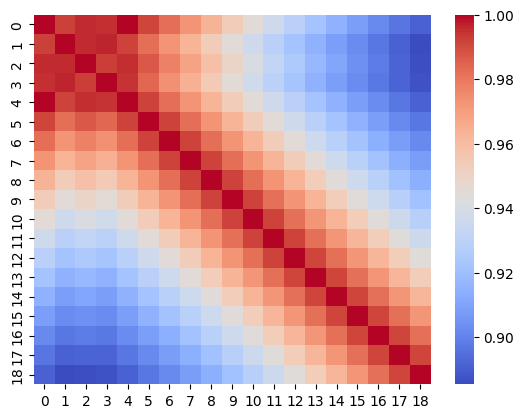

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = np.corrcoef(features[:1000].T)
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
# распределение классов 

Index(['labels'], dtype='object')
False


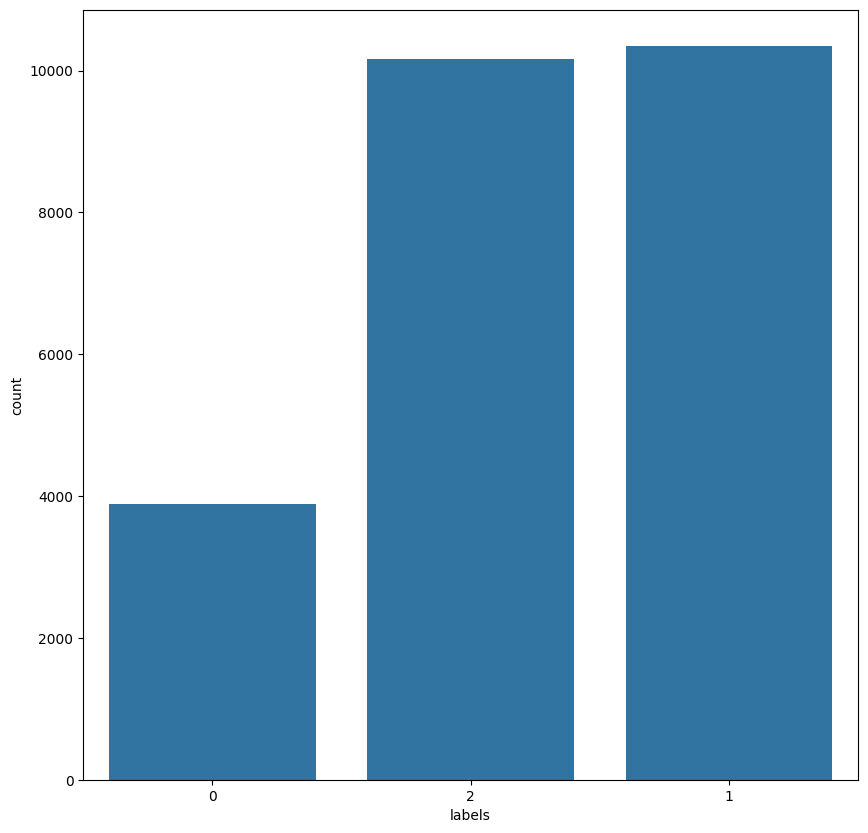

In [7]:
print(labels_ds.columns)
print(labels_ds.empty)
labels_ds['labels'] = labels_ds['labels'].astype(str)

plt.figure(figsize=(10,10))
sns.countplot(x='labels', data=labels_ds);
plt.show()

In [ ]:
# используем GPU

In [8]:
import torch

print(torch.cuda.is_available())  # Должно вернуть True, если GPU доступен
print(torch.cuda.device_count())  # Количество доступных GPU
print(torch.cuda.get_device_name(0))  # Название первого GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

True
1
NVIDIA GeForce GTX 1650
cuda


In [ ]:
# обучаем автоенкодер

In [12]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

input_dim = 19
encoding_dim = 10
learning_rate = 0.001
batch_size = 19
epochs = 3

model = Autoencoder1(input_dim, encoding_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



# Функция обучения
def train(epoch, train_loader):
    features_encoded = []
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        encoded, decoded, train_x = model(data)
        loss = F.mse_loss(train_x, decoded)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        features_encoded.append(encoded)
        
        if batch_idx % 100 == 0:
            print(f"Эпоха {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} "
                  f"({100. * batch_idx / len(train_loader):.0f}%)]\tПотеря: {loss.item() / len(data):.4f}", end = '\r', flush = True)

    print()
    print(f"====> Эпоха {epoch} Средняя потеря: {train_loss / len(train_loader.dataset):.8f}")
    
    return features_encoded
    
# Функция тестирования
def test(epoch, test_loader):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            encoded, decoded, x = model(data)
            test_loss += F.mse_loss(x, decoded)

    test_loss /= len(test_loader.dataset)
    
    print(f"====> Тестовая потеря: {test_loss:.8f}")
    print()

X_train, X_test, y_train, y_test = train_test_split(features, labels_ds, test_size=0.3, random_state=42, stratify=labels_ds)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(y_train.dtypes)
y_train = y_train.astype(int)
print(y_train.dtypes)
y_test = y_test.astype(int)

features_trch_train = torch.tensor(X_train.values, dtype=torch.float32)
labels_trch_train = torch.tensor(y_train.values, dtype=torch.int8)
dataset_tns_train = TensorDataset(features_trch_train, labels_trch_train)
data_loader_train = DataLoader(dataset_tns_train, batch_size=batch_size, shuffle=True)

features_trch_test = torch.tensor(X_test.values, dtype=torch.float32)
labels_trch_test = torch.tensor(y_test.values, dtype=torch.int8)
dataset_tns_test = TensorDataset(features_trch_test, labels_trch_test)
data_loader_test = DataLoader(dataset_tns_test, batch_size=batch_size, shuffle=False)

# Обучение модели
for epoch in range(1, epochs + 1):
    features_encoded_res = train(epoch, data_loader_train)
    test(epoch, data_loader_test)

# Без скалера
#Эпоха 3 [15200/17068 (89%)]	Потеря: 0.0114
#====> Эпоха 3 Средняя потеря: 0.01228871
#====> Тестовая потеря: 0.01225518
# со скалером
#Эпоха 3 [15200/17079 (89%)]	Потеря: 0.0117
#====> Эпоха 3 Средняя потеря: 0.01227468
#====> Тестовая потеря: 0.01224894


labels    object
dtype: object
labels    int64
dtype: object
Эпоха 1 [15200/17079 (89%)]	Потеря: 0.0102
====> Эпоха 1 Средняя потеря: 0.01300493
====> Тестовая потеря: 0.01224895

Эпоха 2 [15200/17079 (89%)]	Потеря: 0.0122
====> Эпоха 2 Средняя потеря: 0.01227483
====> Тестовая потеря: 0.01224895

Эпоха 3 [15200/17079 (89%)]	Потеря: 0.0114
====> Эпоха 3 Средняя потеря: 0.01227465
====> Тестовая потеря: 0.01224894



In [ ]:
####################################################
# классификатор
####################################################

In [13]:
class Classifier1(nn.Module):
    def __init__(self, encoding_dim, num_classes):
        super(Classifier1, self).__init__()
        
        self.fc1 = nn.Linear(encoding_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        #self.relu2 = nn.ReLU()

    def classify(self, x):
        x = self.fc1(x)  # Первый линейный слой
        x = self.relu1(x)  # Применяем ReLU
        x = self.fc2(x)  # Второй линейный слой
        #x = self.relu2(x)  # Применяем ReLU
        return x

    def forward(self, x):
        return self.classify(x)

print('ok')

ok


In [ ]:
# тренируем классификатор
# фичи закодированные автоенкодером и метки из обучения автоенкодера

In [14]:
num_classes = 3

classifier = Classifier1(encoding_dim, num_classes).to(device)

# Оптимизатор
optimizer_clf = optim.Adam(classifier.parameters(), lr=learning_rate)

features_encoded_res_tt = torch.cat(features_encoded_res)
print(features_encoded_res_tt.size())

features_encoded_res_t = torch.tensor(features_encoded_res_tt, dtype=torch.float32)
labels_trch_clf = torch.tensor(y_train.values, dtype=torch.int8)
print(labels_trch_clf.size())

features_encoded_res_t = features_encoded_res_t.to(device)
labels_trch_clf = labels_trch_clf.to(device)

data_loader_encoded = DataLoader(TensorDataset(features_encoded_res_t, labels_trch_clf), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    for batch_encoded, batch_labels in data_loader_encoded:
        batch_encoded.to(device)
        optimizer_clf.zero_grad()
        outputs = classifier(batch_encoded)
        batch_labels2 = batch_labels.argmax(dim=1)
        loss = F.cross_entropy(outputs, batch_labels2)
        
        loss.backward()
        optimizer_clf.step()
    print(f"====> Эпоха {epoch}/{epochs}, Потеря: {loss.item():.8f}")




torch.Size([17079, 10])
torch.Size([17079, 1])


d:\temp\ipykernel_8056\1081363376.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_encoded_res_t = torch.tensor(features_encoded_res_tt, dtype=torch.float32)


====> Эпоха 0/3, Потеря: 0.00009898
====> Эпоха 1/3, Потеря: 0.00001525
====> Эпоха 2/3, Потеря: 0.00000736
